In [1]:
import sys; sys.path.append("../..")
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.ticker import PercentFormatter, ScalarFormatter, FuncFormatter
from configs.env import get_src_path
from models.Charts import Styles

In [2]:
# SETUP DATA
time_span = list(range(1986, 2023))
data = pd.read_json("../../data/ngram_data.json")

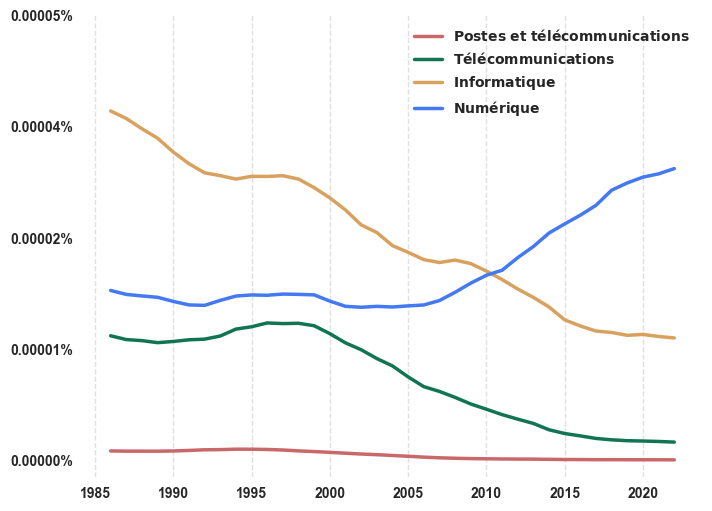

In [4]:
with plt.style.context(Styles.Seaborn.value):
    plt.figure(figsize=(8, 6))
    # Configure ticks
    x_ticks = [ts for ts in time_span if ts % 5 == 0]
    x_ticks.insert(0, 1985)
    y_ticks = np.linspace(0.0, 5.0e-5, 5)

    # Configure color
    plt.gca().set_facecolor((1.0, 1.0, 1.0))
    
    # Set data
    line1 = plt.plot(
        time_span,
        data["timeseries"][0],
        label="$\\bf{Postes\ et\ télécommunications}$",
        linewidth=2.5,
        zorder=2,
        color="#C96868"
    )
    line2 = plt.plot(
        time_span,
        data["timeseries"][1],
        label="$\\bf{Télécommunications}$",
        linewidth=2.5,
        zorder=2,
        color="#117554"
    )
    line3 = plt.plot(
        time_span,
        data["timeseries"][2],
        label="$\\bf{Informatique}$",
        linewidth=2.5,
        zorder=2,
        color="#D8A25E"
    )
    line4 = plt.plot(
        time_span,
        data["timeseries"][3],
        label="$\\bf{Numérique}$",
        linewidth=2.5,
        zorder=2,
        color="#4379F2"
    )

    # Add Legend
    plt.legend(
        fontsize="medium",
    )
    
    # Configure x-scale
    plt.xticks(x_ticks, weight="bold")    
    for x_tick in x_ticks:
        plt.axvline(x=x_tick, color="lightgrey", linewidth=1, linestyle="--", alpha=0.7, zorder=1)

    # Configure y-scale
    plt.yticks(y_ticks, weight="bold")
    def percent_format(x: float) -> float:
        return float(f"{x:.e2}")
    plt.ticklabel_format(style="plain", axis="y", scilimits=(1, 1))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_format))
    plt.gca().yaxis.set_major_formatter(PercentFormatter())

    plt.savefig(f"{get_src_path(Path(os.path.abspath('')))}/images/experience_8/ngram.png", dpi=300)
    
    plt.show();